Imports

In [1]:
import pandas as pd
import numpy as np
import scipy 
import statistics
import matplotlib.pyplot as plt
from geopy import distance
from scipy.stats import pearsonr 

In [2]:
df = pd.read_csv('..\csv\geoGold_erro.csv')

df.dropna(subset=['request_id'], inplace=True)
requests = df['request_id'].unique()

df = df[['request_id', 'lat', 'long','erro', 'geoapi_id']]

df_mapbox = df[df['geoapi_id'] == 'MapBox']
df_tomtom = df[df['geoapi_id'] == 'TomTom']
df_google = df[df['geoapi_id'] == 'Google']
df_ors = df[df['geoapi_id'] == 'OpenRouteService']

In [3]:
# Lista de todos os dataframes
dataframes = [df_mapbox, df_tomtom, df_ors]

# Fazer um inner join para obter apenas os request_ids presentes em todos os dataframes
merged_df = dataframes[0]
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on='request_id', how='inner')

# Renomear as colunas
merged_df.rename(columns={'lat_x': 'lat_M',
    'long_x': 'long_M',
    'erro_x': 'erro_M',
    'geoapi_id_x': 'geoapi_id_M',
    'lat_y': 'lat_T',
    'long_y': 'long_T',
    'erro_y': 'erro_T',
    'geoapi_id_y': 'geoapi_id_T',
    'lat': 'lat_O',
    'long': 'long_O',
    'erro': 'erro_O',
    'geoapi_id': 'geoapi_id_O'}, inplace=True)

merged_df = pd.merge(merged_df, df_google, on='request_id', how='inner')
merged_df.rename(columns={'lat': 'lat_G',
    'long': 'long_G',
    'erro': 'erro_G',
    'geoapi_id': 'geoapi_id_G'}, inplace=True)

print(merged_df.columns)
print(merged_df.head(2))

    

Index(['request_id', 'lat_M', 'long_M', 'erro_M', 'geoapi_id_M', 'lat_T',
       'long_T', 'erro_T', 'geoapi_id_T', 'lat_O', 'long_O', 'erro_O',
       'geoapi_id_O', 'lat_G', 'long_G', 'erro_G', 'geoapi_id_G'],
      dtype='object')
   request_id      lat_M     long_M    erro_M geoapi_id_M     lat_T    long_T  \
0     2767600 -19.833161 -44.008679  0.000053      MapBox -19.83317 -44.00861   
1     2767601 -19.929574 -43.914159  0.000022      MapBox -19.92918 -43.91270   

     erro_T geoapi_id_T      lat_O     long_O    erro_O       geoapi_id_O  \
0  0.007276      TomTom -19.833723 -44.009705  0.124175  OpenRouteService   
1  0.158875      TomTom -19.929303 -43.913496  0.075639  OpenRouteService   

       lat_G     long_G    erro_G geoapi_id_G  
0 -19.833137 -44.008699  0.003482      Google  
1 -19.929600 -43.914146  0.003237      Google  


In [4]:
cv_lat = []
cv_lon = []
cv_media = []

for i in range(merged_df.shape[0]):
    row = [merged_df.iloc[i]['lat_M'], merged_df.iloc[i]['lat_T'], merged_df.iloc[i]['lat_O'], merged_df.iloc[i]['lat_G']]
    cv_lat.append(np.std(row)/np.abs(np.mean(row)))
    row = [merged_df.iloc[i]['long_M'], merged_df.iloc[i]['long_T'],  merged_df.iloc[i]['long_O'],  merged_df.iloc[i]['long_G']]
    cv_lon.append(np.std(row)/np.abs(np.mean(row)))
    #print(cv_lon[-1])
    #print(cv_lat[-1])

cv_lat = np.array(cv_lat)
cv_lon = np.array(cv_lon)
cv_media = cv_lat+cv_lon/2

In [5]:
nMapbox = len(cv_media)/df_mapbox.shape[0]
nTomTom = len(cv_media)/df_tomtom.shape[0]
nGoogle = len(cv_media)/df_google.shape[0]
nOrs = len(cv_media)/df_ors.shape[0]

print(nMapbox,nTomTom,nGoogle, nOrs)

0.9974813454793682 0.9973052800037655 0.9977749261251928 0.9986802413273002


In [6]:
len(merged_df)

84752

In [19]:
len(merged_df)/85000

0.9970823529411764

In [7]:
coeCovM, _ = pearsonr(cv_media, merged_df['erro_M']) 
coeCovT, _ = pearsonr(cv_media, merged_df['erro_T'])
coeCovG, _ = pearsonr(cv_media, merged_df['erro_G'])
coeCovO, _ = pearsonr(cv_media, merged_df['erro_O'])

print('Coeficientes de Correlação Covariância:')
print('Mapbox: ', coeCovM)
print('TomTom: ', coeCovT)
print('Google: ', coeCovG)
print('ORS: ', coeCovO)

Coeficientes de Correlação Covariância:
Mapbox:  0.46692442770085857
TomTom:  0.7268688122039035
Google:  0.04633033598100128
ORS:  0.15519356630617354


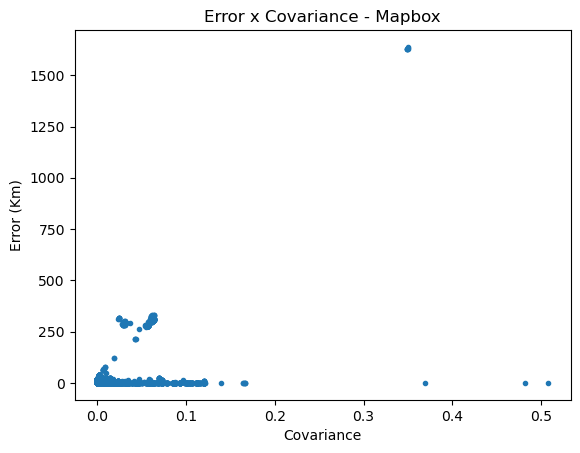

In [8]:
# Seu código para criar o gráfico
plt.plot(cv_media, merged_df['erro_M'], '.')

# Adicione um título ao gráfico
plt.title('Error x Covariance - Mapbox')

# Adicione rótulos para os eixos x e y
plt.xlabel('Covariance')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()


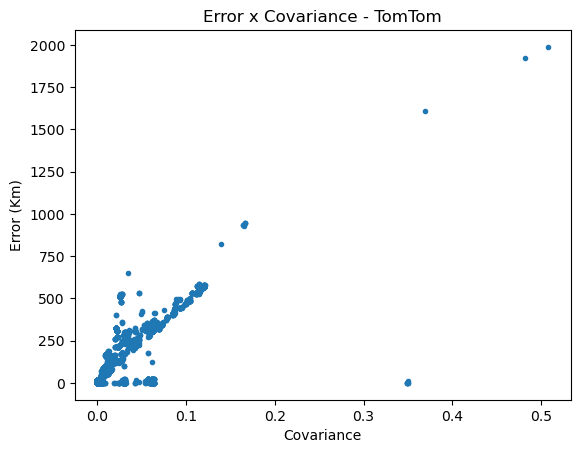

In [9]:
# Seu código para criar o gráfico
plt.plot(cv_media, merged_df['erro_T'], '.')

# Adicione um título ao gráfico
plt.title('Error x Covariance - TomTom')

# Adicione rótulos para os eixos x e y
plt.xlabel('Covariance')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()


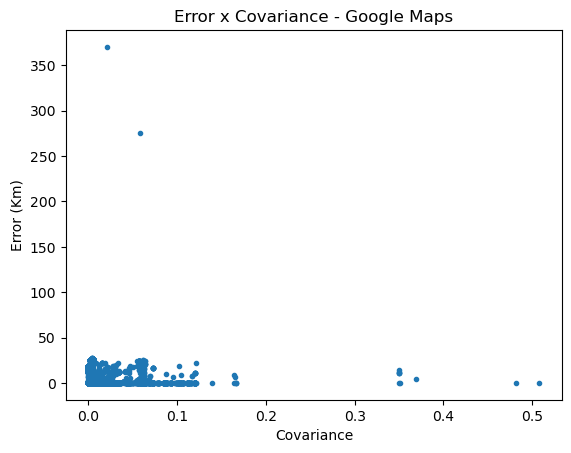

In [10]:
# Seu código para criar o gráfico
plt.plot(cv_media, merged_df['erro_G'], '.')

# Adicione um título ao gráfico
plt.title('Error x Covariance - Google Maps')

# Adicione rótulos para os eixos x e y
plt.xlabel('Covariance')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()


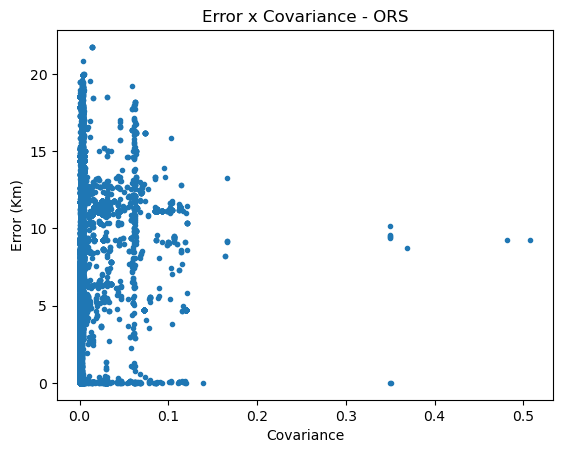

In [11]:
# Seu código para criar o gráfico
plt.plot(cv_media, merged_df['erro_O'], '.')

# Adicione um título ao gráfico
plt.title('Error x Covariance - ORS')

# Adicione rótulos para os eixos x e y
plt.xlabel('Covariance')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()


In [12]:
# Calcular as médias das latitudes e longitudes
merged_df['lat_medio'] = merged_df[['lat_M', 'lat_T', 'lat_O', 'lat_G']].mean(axis=1)
merged_df['lon_medio'] = merged_df[['long_M', 'long_T', 'long_O', 'long_G']].mean(axis=1)

In [13]:
ponto_medio = pd.DataFrame()
ponto_medio['Mapbox'] = merged_df.apply(lambda row: distance.distance((row['lat_M'], row['long_M']), (row['lat_medio'], row['lon_medio'])).km if pd.notnull(row['lat_medio']) and pd.notnull(row['lon_medio']) else None, axis=1)
ponto_medio['Tomtom'] = merged_df.apply(lambda row: distance.distance((row['lat_T'], row['long_T']), (row['lat_medio'], row['lon_medio'])).km if pd.notnull(row['lat_medio']) and pd.notnull(row['lon_medio']) else None, axis=1)
ponto_medio['ORS'] = merged_df.apply(lambda row: distance.distance((row['lat_O'], row['long_O']), (row['lat_medio'], row['lon_medio'])).km if pd.notnull(row['lat_medio']) and pd.notnull(row['lon_medio']) else None, axis=1)
ponto_medio['Google'] = merged_df.apply(lambda row: distance.distance((row['lat_G'], row['long_G']), (row['lat_medio'], row['lon_medio'])).km if pd.notnull(row['lat_medio']) and pd.notnull(row['lon_medio']) else None, axis=1)


In [15]:
coePmM, _ = pearsonr(ponto_medio['Mapbox'], merged_df['erro_M']) 
coePmT, _ = pearsonr(ponto_medio['Tomtom'], merged_df['erro_T'])
coePmG, _ = pearsonr(ponto_medio['Google'], merged_df['erro_G'])
coePmO, _ = pearsonr(ponto_medio['ORS'], merged_df['erro_O'])

print('Coeficientes de Correlação Ponto Médio:')
print('Mapbox: ', coePmM)
print('TomTom: ', coePmT)
print('Google: ', coePmG)
print('ORS: ', coePmO)

Coeficientes de Correlação Ponto Médio:
Mapbox:  0.7764231898939935
TomTom:  0.9873048167774371
Google:  0.07540142286740656
ORS:  0.2774817643407023


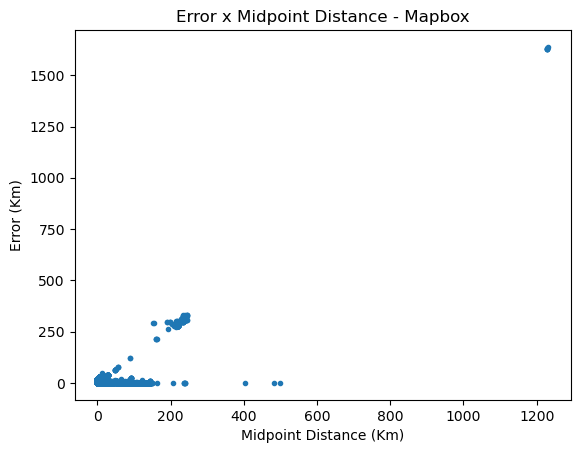

In [14]:
# Seu código para criar o gráfico
plt.plot(ponto_medio['Mapbox'], merged_df['erro_M'], '.')

# Adicione um título ao gráfico
plt.title('Error x Midpoint Distance - Mapbox')

# Adicione rótulos para os eixos x e y
plt.xlabel('Midpoint Distance (Km)')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()

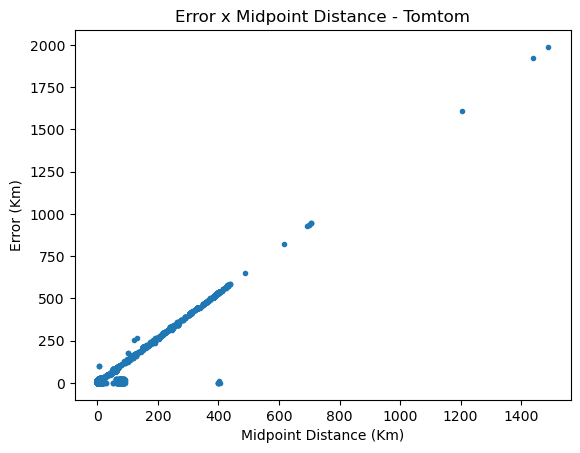

In [16]:
# Seu código para criar o gráfico
plt.plot(ponto_medio['Tomtom'], merged_df['erro_T'], '.')

# Adicione um título ao gráfico
plt.title('Error x Midpoint Distance - Tomtom')

# Adicione rótulos para os eixos x e y
plt.xlabel('Midpoint Distance (Km)')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()

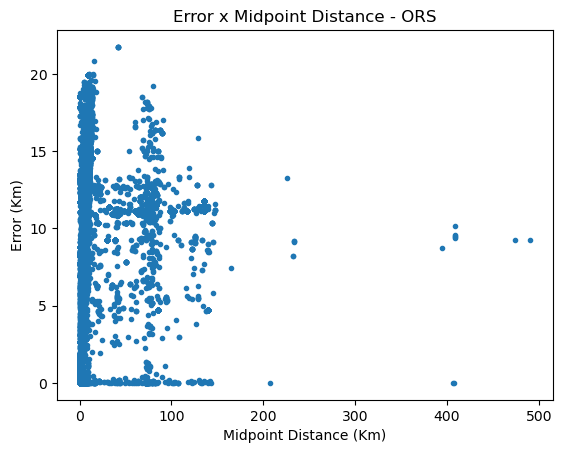

In [17]:
# Seu código para criar o gráfico
plt.plot(ponto_medio['ORS'], merged_df['erro_O'], '.')

# Adicione um título ao gráfico
plt.title('Error x Midpoint Distance - ORS')

# Adicione rótulos para os eixos x e y
plt.xlabel('Midpoint Distance (Km)')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()

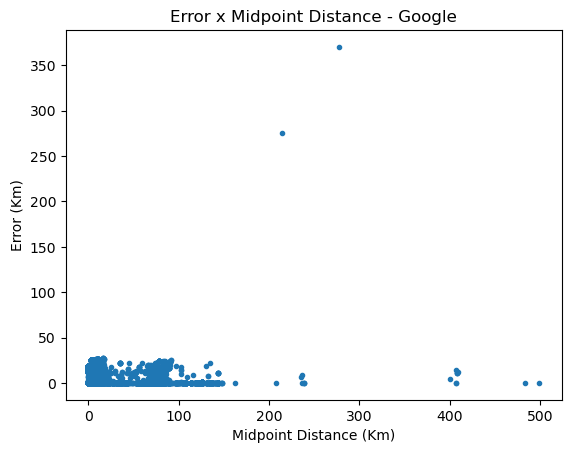

In [18]:
# Seu código para criar o gráfico
plt.plot(ponto_medio['Google'], merged_df['erro_G'], '.')

# Adicione um título ao gráfico
plt.title('Error x Midpoint Distance - Google')

# Adicione rótulos para os eixos x e y
plt.xlabel('Midpoint Distance (Km)')
plt.ylabel('Error (Km)')

# Mostra o gráfico
plt.show()